In [52]:
#Librerias
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

Airbnb es un enorme mercado en línea para que la gente alquile lugares para alojarse. Es un mercado grande y lucrativo, pero muchos vendedores son simplemente individuos que alquilan su propia residencia principal para visitas cortas. Incluso los vendedores más grandes suelen ser pequeñas empresas con sólo un pequeño número de lugares para alquilar. Por ello, tienen una capacidad limitada para evaluar las tendencias a gran escala y fijar los precios óptimos.


Nuestra pregunta: ¿Qué características son más relevantes para el precio de un anuncio de Airbnb?

Nuestro conjunto de datos tiene 30.179 filas y 81 columnas. A continuación se detallan algunas de las columnas más importantes:

1. ```neighbourhood```:  which neighborhood the property is in
2. ```longitude```, ```latitude```: longitude and latitude
3. ```property_type```: type of property, such as apartment, condo etc.
4. ```bathrooms```: number of bathrooms
5. ```bedrooms```: number of bedrooms
6. ```price```:  price of the listing
7. ```number_of_reviews```: number of reviews given by customers who stayed there
8. ```parking```: 1 means there is parking available, -1 means there is not

Para otras variables categoricas tales como: ```outdoor_friendly```, ```gym```, etc., the 1,-1 sson interpretadas similarmente como ```parking```.

### Ejercicios

1. Cargue los datos

In [53]:
# para mostrar hasta 100 columnas: pd.options.display.max_columns = 100
df= pd.read_csv("data/airbnb_nyc.csv")
df.head(10)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
5,11943,Country space in the city,NaN,Ditmas Park. Entire 3rd floor. 2 large rooms ...,none,NaN,NaN,"No smoking, no cooking on 3rd floor",45445,40098.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,12299,Beautiful Sunny Park Slope Brooklyn,NaN,This is a large one bedroom apartment located ...,none,NaN,NaN,NaN,47610,40108.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
7,12627,Entire apartment in central Brooklyn neighborh...,My place is close to Prospect Park and you’ll...,My place is close to Prospect Park and you’ll...,none,"Steps from Beautiful Prospect Park, Zoo, Brook...","NYC Subway lines Q, B, and S to Prospect Park....",NaN,49670,40115.0,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
8,13050,bright and stylish duplex,"Wonderfully bright, comfortable, and stylish, ...","Wonderfully bright, comfortable, and stylish, ...",none,The Putnam-Throop area of Bed-Stuy is a vibran...,"Three useful buses (26, 52, 43) are three or f...","Absolutely, positively NO smoking, either insi...",50846,40119.0,...,-1,1,-1,-1,-1,1,-1,-1,-1,-1
9,14322,Beautiful Apartment in Manhattan!!!,"You will find a welcoming apartment, I love to...","You will find a welcoming apartment, I love to...",none,"They are very private, so please respect their...","You have trains N/R/6 and buses(on 2av, 3ave 2...",Cleaning fee is required. NO SHOES USED IN THE...,56284,40138.0,...,1,1,-1,1,-1,-1,-1,-1,-1,-1


2. Genere estadisticas descriptivas para las variables: 'price','bedrooms','bathrooms','number_of_reviews'

In [54]:
df[['price','bedrooms','bathrooms','number_of_reviews']].describe()

,price,bedrooms,bathrooms,number_of_reviews
count,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,4.459889
std,93.151824,0.614659,0.422225,5.265633
min,0.000000,1.000000,0.500000,0.000000
25%,65.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,1.000000,2.000000
75%,175.000000,1.000000,1.000000,7.000000
max,500.000000,11.000000,7.500000,20.000000


3. Genere histogramas de las variables mencionadas en el punto 2. Qué puede observar de ellos?

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

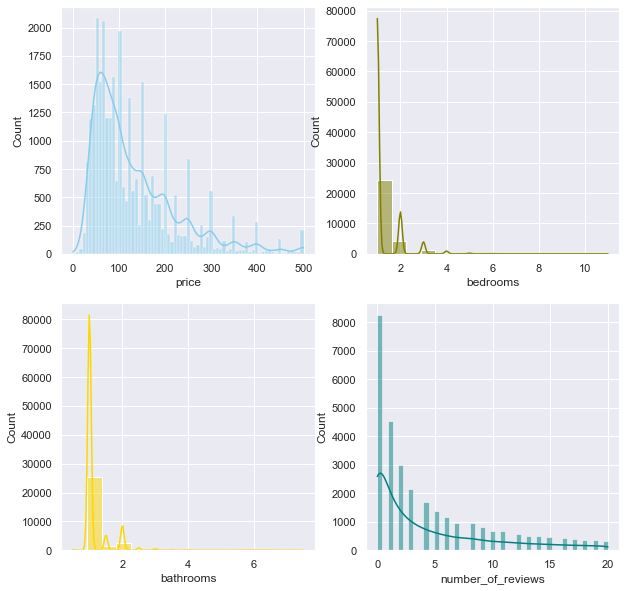

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x="price", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="bedrooms", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="bathrooms", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="number_of_reviews", kde=True, color="teal", ax=axs[1, 1])
#
#sns.histplot(data = df, x = 'bedrooms', y = 'price', palette = 'colorblind')

## se puede decir que los precios se concentran entre los 50 y los 100 dolares 
##  La mayoria de los sitios de hospedaje cuentan con una sola habitacion, al igual que el numero de baños es al menos uno para cada sitio
## Tambien se aprecia que la mayoria de los sitios no cuentan con reseña

## todas las variables tienen una distribucion de  cola larga 

R/

4. Cree diagramas de cajas y bigotes para:  price vs. bathrooms, price vs. number_of_reviews, and price vs. review_scores_cleanliness, price vs bedrooms. Qué puede observar en cada uno de ellos?

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

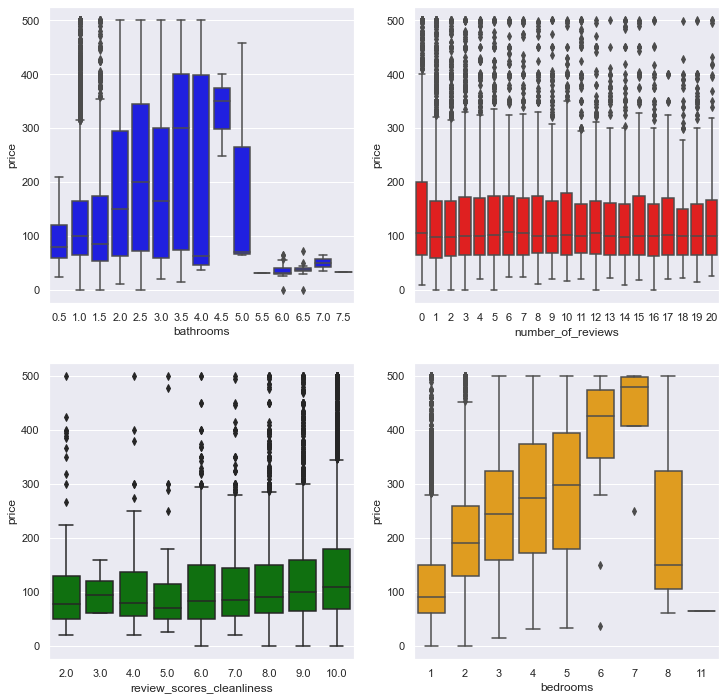

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.boxplot(data=df, x="bathrooms",y = 'price', color="blue", ax=axs[0, 0])
sns.boxplot(data=df, x="number_of_reviews",y = 'price', color="red", ax=axs[0, 1])
sns.boxplot(data=df, x="review_scores_cleanliness",y = 'price', color="green", ax=axs[1, 0])
sns.boxplot(data=df, x="bedrooms",y = 'price', color="orange", ax=axs[1, 1])

## 

R/

5. Escriba un código para imprimir las columnas que están correlacionadas positivamente con el precio, de la más positiva a la menos positiva. Del mismo modo, imprima las columnas que están correlacionadas negativamente, de la más negativa a la menos negativa. (Pista: use el metodo corr()). A partir de las tablas anteriores, ¿qué factores están más correlacionados con el precio (positivo o negativo)? ¿Qué correlaciones son sorprendentes, y qué hipótesis podría explicarlas?

In [57]:
corr = df.corr()
corr.sort_values(by = ['price'], ascending = False, inplace = True)

In [58]:
corrPositiva= []
corrNegativa = []

for i in range(len(corr['price'])):
    if corr['price'][i]>0:
        corrPositiva.append([corr['price'].index[i],corr['price'][i]])
for elemento in corrPositiva:
    print(elemento)

['price', 1.0]
['accommodates', 0.5715408030523419]
['bedrooms', 0.4545392952627109]
['beds', 0.42135543192177516]
['guests_included', 0.3219697278871959]
['tv', 0.2715630617546089]
['elevator', 0.2296101496256366]
['calculated_host_listings_count_entire_homes', 0.21889004007559978]
['white_goods', 0.2142825439123786]
['gym', 0.20989211976201635]
['child_friendly', 0.20618888912260278]
['air_conditioning', 0.19658160022882415]
['host_listings_count', 0.1948908811051531]
['calculated_host_listings_count', 0.1850975392495621]
['bathrooms', 0.16327595368841746]
['private_entrance', 0.14645253467960914]
['review_scores_location', 0.1403082924997561]
['coffee_machine', 0.13345730686137694]
['availability_365', 0.11886351203433343]
['bbq', 0.11025793661513311]
['self_check_in', 0.10891359452778691]
['bed_linen', 0.10529537255299408]
['availability_60', 0.09985824933370223]
['long_term_stays', 0.09638050392653627]
['review_scores_cleanliness', 0.09532880373326595]
['availability_90', 0.093482

### Algunos atributos que nos parecieron sorprendentes fueron:
### nature and views dada su baja correlacion pero una posible explicación es que los usuarios de airbnb unicamente alquilan para dormir.
### vemos que no se presenta ninguna correlacion de mas de 0.6 lo cual puede deberse a que no hay un factor altamente determinante cuyo alto valor indique un alto precio
### No se presenta ningun valor determinante posiblemente porque las personas solo buscan donde hospedarse teniendo en cuenta que airbnb es mas barato que un hotel tradicional

In [59]:
corr.sort_values(by = ['price'], ascending = True, inplace = True)
for i in range(len(corr['price'])):
    if corr['price'][i]<0:
        corrNegativa.append([corr['price'].index[i],corr['price'][i]])
        
for elemento in corrNegativa:
    print(elemento)

['longitude', -0.2941956298975778]
['calculated_host_listings_count_private_rooms', -0.12750405358969907]
['calculated_host_listings_count_shared_rooms', -0.10138856595606192]
['smoking_allowed', -0.05413124597994581]
['host_greeting', -0.0513556111614514]
['number_of_reviews', -0.02922946807072701]
['host_identity_verified', -0.022860924419626387]
['parking', -0.01938270510656689]
['host_is_superhost', -0.016325397159084803]
['number_of_reviews_ltm', -0.01148136456127585]
['host_since', -0.009671394118026894]
['review_scores_value', -0.0059420091363392765]


R/

### Encontramos que la latitud tiene una correlacion positiva y la longitud una correlacion negativa por lo que intuimos que entre mas alta la latitud y mas baja la longitud mayor sera el precio del alquiler
### tambien notamos que a mas numero de parqueadores menor es el precio 

### Mas herramientas para visualización. Mapas!

Creemos un mapa interactivo para visualizar nuestros datos ya que tenemos lat y long. Como nuestros datos son de NY podemos situarnos allí

In [60]:
ny_coords = [40.738, -73.98] # lat, long
folium_map= folium.Map(location=ny_coords,zoom_start=13)
folium_map

Con la función zip podemos concatener las coordenadas junto con el precio de la vivienda para luego crear una lista. Nota: reemplazar data con el nombre de su dataframe

In [62]:
my_zip = zip(df['latitude'], df['longitude'], df['price'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(40.64749, -73.97237, 149),
 (40.80902, -73.9419, 150),
 (40.79685, -73.94872, 190),
 (40.65599, -73.97519, 60),
 (40.86754, -73.92639, 80),
 (40.63702, -73.96327, 150),
 (40.66278, -73.97966, 120),
 (40.65944, -73.96238, 150),
 (40.68554, -73.9409, 115),
 (40.73961, -73.98074, 200),
 (40.72004, -73.99104, 110),
 (40.6734299999999, -73.98338, 225),
 (40.65401, -73.96323, 130),
 (40.72912, -73.98057, 50),
 (40.68634, -73.966, 98)]

Finalmente crearemos un mapa de calor HeatMap, que nos ayudará a visualizar donde están las más costosas

In [63]:
hm_layer = HeatMap(list_of_my_zip,
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

Finalmente lo añadimos...

In [65]:
folium_map.add_child(hm_layer)
folium_map

6. Nombre los lugares de NY dondee son más caros y menos caros

R/

### Los alquileres son mas costosos cerca al distrito financiero (wall street), en las cercanias a central park y en hell's kitchen

7. Realizar los mismo que lo anterior pero ahora con review_score_rating en lugar de price. Nota: debes eliminar los NA's, asegurate de crear una copia de tu dataset original con el comando: data.copy() para evitar modificar el original 

In [80]:
df2 = df.copy()
df2 = df2.dropna()
folium_map_2= folium.Map(location=ny_coords,zoom_start=13)
my_zip_2 = zip(df2['latitude'], df2['longitude'], df2['review_scores_rating'])
list_of_my_zip_2 = list(my_zip_2)
list_of_my_zip_2[0:15]

[(40.64749, -73.97237, 98.0),
 (40.65599, -73.97519, 97.0),
 (40.68554, -73.9409, 94.0),
 (40.73961, -73.98074, 95.0),
 (40.82803, -73.94731, 100.0),
 (40.82279, -73.95139, 84.0),
 (40.68157, -73.98989, 98.0),
 (40.7254, -73.9815699999999, 90.0),
 (40.65593, -73.96053, 83.0),
 (40.6318799999999, -73.93248, 100.0),
 (40.73409, -73.95348, 100.0),
 (40.71561, -73.94835, 100.0),
 (40.7159599999999, -73.93938, 100.0),
 (40.77185, -73.90502, 87.0),
 (40.71756, -73.99503, 91.0)]

In [81]:
hm_layer = HeatMap(list_of_my_zip_2,
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )
folium_map_2.add_child(hm_layer)
folium_map_2